# Qualitative clustering results

We seek to demonstrate qualitative properties of some clustering algorithms. Such an approach should never be mistaken for an actual evaluation of clustering quality, but rather as a an approach to gain general intuition into potential qualitative properties of a clustering.

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from hdbscan import HDBSCAN
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_context('poster')

In [2]:
data = np.load('clusterable_data.npy')

In [3]:
kmeans_labels = KMeans(6).fit_predict(data)
dbscan_labels = DBSCAN(eps=0.025).fit_predict(data)
hdbscan_labels = HDBSCAN(min_cluster_size=15).fit_predict(data)

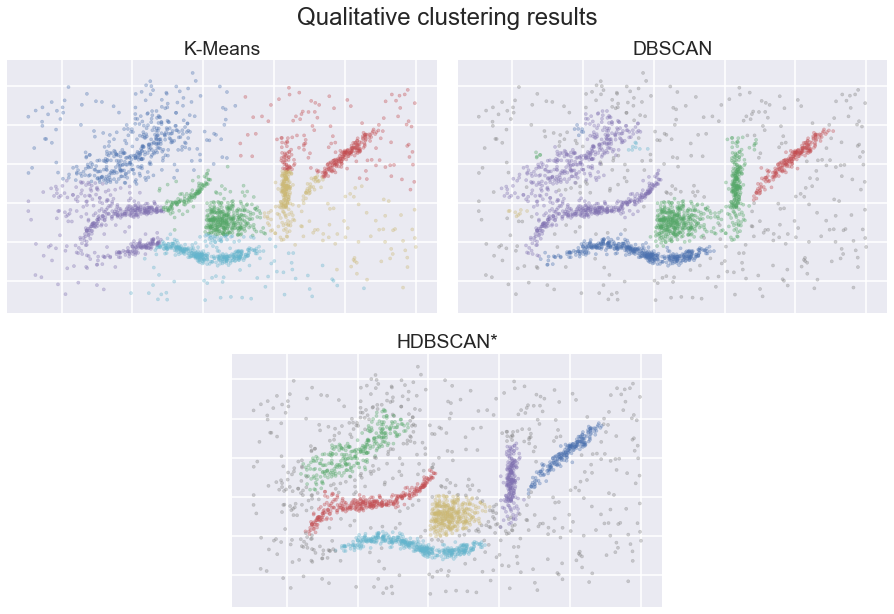

In [4]:
fig = plt.figure()
pal = sns.color_palette('deep', 8)
gs = plt.GridSpec(2,8)
ax1 = plt.subplot(gs[0,0:4])
ax1.scatter(*data.T, c=[pal[x] for x in kmeans_labels], alpha=0.35, s=10)
ax1.set_title('K-Means')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
ax2 = plt.subplot(gs[0,4:8])
ax2.scatter(*data.T, c=[pal[x] if x >= 0 else (0.5, 0.5, 0.5) 
                        for x in dbscan_labels], alpha=0.35, s=10)
ax2.set_title('DBSCAN')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
ax3 = plt.subplot(gs[1,2:6])
ax3.scatter(*data.T, c=[pal[x] if x >= 0 else (0.5, 0.5, 0.5) 
                        for x in hdbscan_labels], alpha=0.35, s=10)
ax3.set_title('HDBSCAN*')
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
fig.suptitle('Qualitative clustering results', fontsize=24)
gs.tight_layout(fig, rect=[0, 0, 1, 0.96])
plt.savefig('qualitative_clustering.png')